# Tutorial 030: Permutation (randomization) testing and bootstrapping...non-parametraic statistics. 

## Goal of tutorial: compare standard stats and non-parametric approaches and develop an intuition about why, in many cases, non-parametric stats are preferred
* In parametric NHT stats, we make a lot of assumptions about our data and how it is sampled and distributed (e.g. normal distribution, independent samples) and that we can then use standardized distributions (e.g. t-distribution) to make inferences about the population.

* Using non-parametric randomization and bootstrapping approaches, we we can back away from many of the assuptions usually associated with our stats. 

* We can collect our data and then directly evaluate our confidence in the summary statistics (and also differences between conditions) without resorting to comparing to standardized distributions.

* Sometimes, i.e. when you have lots of data and all assumptions are met, these approaches will converge on the answers you get from parametric stats.

* However, there are many cases where the methods will diverge, and as seen in the tutorial below, there are good reasons to favor these non-parametric approaches over standard statistical test.

## Randomization tests
In a typical study, you collect data from two groups (or more) and then
you want to decide if the two group means are different given the separation 
of their means and their variances. So you compute the differences
between the means, weight that difference by the variance, and then
compare that test statistic again a standard look up table (e.g. a
t-distribution or similar) to get a p-value.  
This standard approach makes a number of assumptions:
* The data are normally distributed so that the test stat follows the expected distribution (i.e. a t-distribution)
* That we have taken random and independent samples from the population(s) 
* We use a standard look-up-table to put a p-value on our test statistic so that we can genearlize our results to the entire population

In contrast, *RANDOMIZATION TESTING* relaxes many of these assumptions in place of a different approach.
* We do not need normally distributed data, etc. In fact, we rarely seem to meet this condition in real data anyway, so this is a pretty handy thing. We also relax the independent and random sampling assumptions - we are just going to deal the data that we have in hand and take it as it comes. 
* With randomization testing, we are not able to make a population inference (see bootstrapping section below for notes about that). 
* Instead, we are evaluating how likely our summary statistic is given the null hypothesis that our experimental manipulations have no effect (or phrased a different and more useful way - the null hypthesis that our experimental condition labels have no effect on the outcome of the summary statistic). 

<div class="alert alert-info">
The test statistic that we generate is not compared to a standard look up table - instead we generate our own 'null' distribution against which to compare the data that we collect to evalute the propbability of obtaining a test statistic of the observed magnitude given that our condition labels (or our manipulation) had no effect.
</div>

## Import our standard numpy and plotting stuff...also stats from scipy

In [1]:
import numpy as np
from scipy import stats  # has t-tests and other stats stuff...
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## Start by generating some fake data from two experimental conditions. 

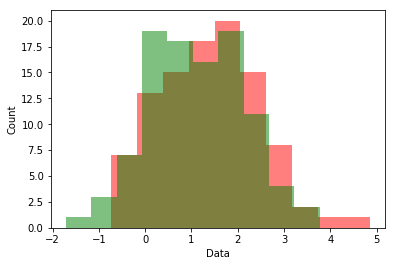

t-value:  2.05  p-value:  0.04333889


In [2]:
N = 100                      # number of data points (or 'subjects')
mu_of_conditions = 1.4,1     # means of each distribution
var_of_conditions = 1,1      # variance of each distribution - start with equal variances

# then use random.randn to generate two data sets with specified 
d1 = (np.random.randn(N,) * var_of_conditions[0]) + mu_of_conditions[0]
d2 = (np.random.randn(N,) * var_of_conditions[1]) + mu_of_conditions[1]

# histogram to show the data. Use alpha value to set transparency so that you can see overlap 
plt.hist(d1, color='r', alpha=.5)
plt.hist(d2, color='g', alpha=.5)
plt.xlabel('Data')
plt.ylabel('Count')
plt.show()

# do a t-tests using scipy.stats (note - this is repeated measures t-test, or 'related samples')
t_val = stats.ttest_rel(d1,d2)

# print out t and p-values
print('t-value: ', np.round(t_val.statistic,2), ' p-value: ', np.round(t_val.pvalue,8))

## now generate a set of t-values across repeated iterations of this 'study'

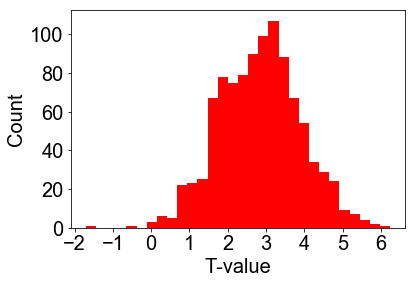

In [3]:
N = 100                     # number of data points (or 'subjects')
mu_of_conditions = 1.4,1    # means of each distribution
var_of_conditions = 1,1     # variance of each distribution - start with equal variance, then make unequal

# number of repeats of the study
num_studies = 1000

# allocate array for storing t-values
study_t_val = np.zeros(num_studies)

for i in np.arange(num_studies):
    # then use random.randn to generate two data sets with specified 
    d1 = (np.random.randn(N,) * var_of_conditions[0]) + mu_of_conditions[0]
    d2 = (np.random.randn(N,) * var_of_conditions[1]) + mu_of_conditions[1]

    t_val = stats.ttest_rel(d1,d2)
    
    # store the t-value each time...
    study_t_val[i] = t_val.statistic
    
# histogram to show the data. 
# can specify the number of bins to use in the call to plt.hist
h = plt.hist(study_t_val, color='r', alpha=1, bins=30)
plt.xticks(**fig_font)
plt.yticks(**fig_font)
plt.xlabel('T-value', **fig_font)
plt.ylabel('Count', **fig_font)
plt.show()    

## now do this the faster, numpy way...ditch the loop

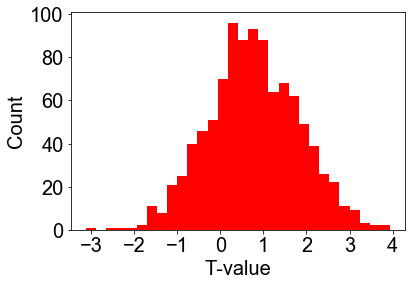

In [4]:
N = 100                     # number of data points (or 'subjects')
mu_of_conditions = 1.1,1      # means of each distribution
var_of_conditions = 1,1     # variance of each distribution - start with equal variance, then make unequal

# number of times we repeat the study
num_studies = 1000

# then use random.randn to generate two data sets with specified 
# instead of looping generate a N x num_studies matrix all at once 
d1 = (np.random.randn(N,num_studies) * var_of_conditions[0]) + mu_of_conditions[0]
d2 = (np.random.randn(N,num_studies) * var_of_conditions[1]) + mu_of_conditions[1]

# do the t-test on all columns of data (i.e. across rows, or across the first dim)
t_val = stats.ttest_rel(d1,d2,axis=0)
    
# store the t-value each time...
study_t_val = t_val.statistic       
    
# histogram to show the data. Use alpha value to set transparency so that you can see overlap 
plt.hist(study_t_val, color='r', alpha=1, bins=30)
plt.xticks(**fig_font)
plt.yticks(**fig_font)
plt.xlabel('T-value', **fig_font)
plt.ylabel('Count', **fig_font)
plt.show()    

## Now set things up to try a randomization test
* Start: we'll generate only one set of experimental data
* Then we'll compute and store the t-value that we observe (i.e. we just do our normal analysis)

<div class="alert alert-warning">
Run this cell of code a few times with 1.3 and 1 as the means and equal variance 1,1 for both conditions. You should see that you often get a null result. Run it a few more times...sometimes the p-value is >4.5! 
</div>

In [5]:
N = 100                      # number of data points (or 'subjects')
mu_of_conditions = 1.3,1       # means of each distribution
var_of_conditions = 1,1      # variance of each distribution - start with equal variance, then make unequal

# number of times we repeat the the study - set to 1 for this demo of the randomization test
# as if you just collected your data set and then you're sitting down to do the stats. 
num_studies = 1

# make our data sets
d1 = (np.random.randn(N,num_studies) * var_of_conditions[0]) + mu_of_conditions[0]
d2 = (np.random.randn(N,num_studies) * var_of_conditions[1]) + mu_of_conditions[1]

# do the t-test on all columns of data
# will write out the formula for the t-test here because it will make the randomization code 
# easier to understand: mean difference divided by the S.E. of the difference
study_t_val = np.mean(d1-d2, axis=0) / (np.std(d1-d2, axis=0) / np.sqrt(N-1))

# compute our p-value using stats.t.cdf (could also get this from stats.ttest_x but lets compute by hand)
p_value = 2*(1-stats.t.cdf(study_t_val, N-1))

# print out our test statistic and our p-value
print('Tval: ', study_t_val, 'Pval: ', p_value)

Tval:  [3.10437793] Pval:  [0.00248649]


### Next step: generate the actual distribution of your test statistic under the null that your experimental conditions don't matter
* Goal is to test the likelihood of observing our actual t-value under the null hypothesis that the experimental manipulation has no effect
* Another way of stating the null is that "condition labels shouldn't matter" (because if the condition has no effect, then shouldn't matter whether the data point came from condition A or B). 
* So we can randomly assign the data points as coming from either condition A or B, with the constraint that we keep the balance of data points in condition A and B the same as in the original data

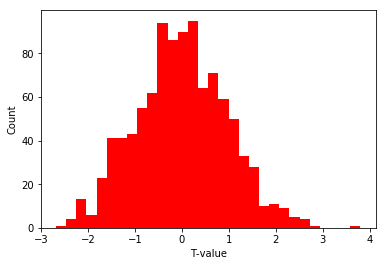

Randomization-based p-value:  0.002  Parametric P-value:  [0.0025]


In [6]:
# how many times do we want to randomize the data and then eval our
# test statistic again?
num_randomizations = 1000

# allocate a matrix to store the output
rand_t = np.zeros(num_randomizations)

# matrix to store our t-values under the null that condition labels don't matter
null_t_val = np.zeros(num_randomizations)

# start a loop to iterate over randomizations of condition labels
for i in np.arange(num_randomizations):
    
    # conceptualize the randomization as randomly changing the sign of the difference 
    # between each pair of entries in d1 and d2
    # note: bonus points for figuring out one small potential flaw in this line of code...
    rand_data = np.sign(np.random.rand(N,num_studies)-.5) * (d1-d2)
    
    null_t_val[i] = np.mean(rand_data, axis=0) / (np.std(rand_data, axis=0) / np.sqrt(N-1))
    
#show the distribution of tvals under the null
plt.hist(null_t_val, color='r', alpha=1, bins=30)
plt.xlabel('T-value')
plt.ylabel('Count')
plt.show()    

# now print out our mean t-value under the null, and the associated pvalue
# that is generated by comparing our observed t-value with the distribution
# of tvalues under the null!
rand_p_value = 2*(1-(np.sum(study_t_val>null_t_val) / num_randomizations))
print('Randomization-based p-value: ', np.round(rand_p_value,4), ' Parametric P-value: ', np.round(p_value,4))

## So the two pvalues are about the same...and that's good becuase all the assumptions of the parametric t-test were met (normally distributed data, etc). But this is not always true when we violate assumptions
* lets see what happens here when we violate assumptions

[[1.         0.98378393]
 [0.98378393 1.        ]] 

0.9837839300743859 

Tval:  18.19181700002586 Pval:  4.2042613834780695e-10


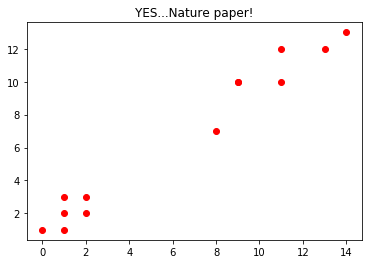

In [7]:
# generate some fake data...
d1 = np.array([2,1,2,1,0,1,8,9,11,9,11,14,13])
d2 = np.array([2,3,3,2,1,1,7,10,12,10,10,13,12])

# figure out how many data points 
N = len(d1)

# figure out correlation between them...
corr = np.corrcoef(d1,d2)
print(corr, '\n')

# Neat trick...index the function call. 
corr = np.corrcoef(d1,d2)[0,1]
print(corr, '\n')

# compute the t-value/p-value corresponding to the correlation
t_val = (corr*np.sqrt(N-2)) / np.sqrt(1-corr**2)
p_value = 2*(1-stats.t.cdf(t_val, N-1))
print('Tval: ', t_val, 'Pval: ', p_value)

# plot the data...
plt.scatter(d1,d2,color='r')
plt.title('YES...Nature paper!')
plt.show()

In [ ]:
# figure out how many times we want to run the randomization test...
num_randomizations = 1000
rand_corr = np.zeros(num_randomizations)
rand_t_val = np.zeros(num_randomizations)
tmp0 = np.zeros(N)
tmp1 = np.zeros(N)

# start a loop over randomization iterations
for i in np.arange(num_randomizations):
    
    # write this out explicitly for clarity - randomly assigning numbers from d1 or d2
    # i.e. condition doesn't matter. 
    for j in np.arange(N):   
        if np.random.rand(1) < .5:
            tmp0[j] = d1[j]
            tmp1[j] = d2[j]
        else:
            tmp0[j] = d2[j]
            tmp1[j] = d1[j]

    # then correlate the two randomized data vectors...compute tvalues
    rand_corr[i] = np.corrcoef(tmp0,tmp1)[0,1]
    rand_t_val[i] = (rand_corr[i]*np.sqrt(N-2)) / np.sqrt(1-rand_corr[i]**2)

# compute the p-value of our real t-score (t_val) vs our radomized distribution
rand_p_value = 2*(1-(np.sum(t_val>rand_t_val) / num_randomizations))
print('Randomization-based p-value: ', np.round(rand_p_value,8), ' Parametric P-value: ', np.round(p_value,8))

# plotting the distribution of p-values that we observe under the null
plt.hist(rand_t_val, color='r', alpha=1, bins=30)
plt.xlabel('T-value under null')
plt.ylabel('Count')
plt.title('Bummer...have to send to Science')
plt.show()

## Using bootstrapping to estimate true CIs on your data

Basic background: Imagine you do a typical experiment in your lab. 
* You run a subject  (human/rodent/whatever) through your memory/perception test and you get a 100 numbers, one number that indexes the magnitude of your  dependent variable on each trial (RTs/Accuracy/EEG amplitude/spike rate/GSR/etc).
* Now, you compute your mean over your 100 samples and get 10 (spikes/%cor/etc). 
* Now you might reasonably wonder: this subject produced a mean score of  10 in my experiment, but what if I were to run her again? Would I get the same number? What if she participated 1,000 times in the experiment? Would I get 10 every time? 
* Could ask the same question about generalizing to a population based on sample mean, variance, etc
* So the problem is that you're in a situation where you want to know the reliability of a number (i.e. the central tendency of 10), but you only get to make 1 set of measurements. 
* There are several ways that you can estimate the number's reliability, but one of the best is to use bootstrapping to estimate confidence intervals on your summary statistics (mean, variance, t-val, etc) by resampling the observed data with replacement
* The idea is that you can estimate how certain you are of a summary stat, and you can do that either by taking more and more and more observations of data (often prohibitive) or by sampling a reasonable amount of data and then bootstrapping

## First lets look at putting confidence intervals on a sample mean

In [ ]:
# generate a huge data set that is meant to represent our entire population 
# (i.e. we sample from all people on earth)
N = 100000
pop_mean = 100
pop_var = 10
pop_data = (np.random.randn(N) * pop_var) + pop_mean

# now lets run an experiment and just sample a few people
S_N = 10

# get a random set of S_N values from the pop data (could do all in one line...)
# note that this is sampling without replacement
index = np.random.permutation(N)[0:S_N]

# use that index to grab the data...
samp_data = pop_data[index]

# print the mean of our sample data
print(np.mean(samp_data,axis=0))

## Run a bunch of experiments to get a feel for how variable your estimate of the mean is based on sample size (this is basic central limit theorum stuff). 

In [ ]:
# how many subjects per experiment
S_N = 2 # 10,20,1000,N

# now do this a whole bunch of times and see how much our sample mean varies wrt the true mean
num_experiments = 500
samp_mean = np.zeros(num_experiments)

for i in np.arange(num_experiments):
    # get a random set of S_N values from the pop data (could do all in one line...)
    index = np.random.permutation(N)[0:S_N]

    # use that index to grab the data...
    samp_data = pop_data[index]
    
    # compute mean of our samples from each experiment that we did
    samp_mean[i] = np.mean(samp_data,axis=0)

# histogram it
plt.hist(samp_mean, color='r', alpha=1, bins=30)
plt.axvline(pop_mean, color='k', linewidth=1)
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()

## So as the sample size goes up, we better approximate the population distribution...no surprise there. 

* However, in practice, you only sample some finite set of data in a given experiment
* Based on that sample, you can get an estimate of the mean (or other summary statistic)
* But how good is that estimate? How accurately does it reflect the true population parameter? 
* To really know, you could go out and sample the entire population
* Or you can take your sample data and repeatedly estimate the statistic of interest after drawing a new set of data using resampling with replacement 

In [ ]:
# how many subjects per experiment...start with 20
S_N = 20

# grab a set of S_N samples from the population data
samp_data = pop_data[np.random.permutation(N)[0:S_N]]

# now do this a whole bunch of times and see how much our sample mean varies wrt the true mean
num_bootstraps = 5000
boot_mean = np.zeros(num_bootstraps)

# now loop over bootstrap iterations. Each time generate a "new" data set
# by resampling our observed data with replacement
for i in np.arange(num_bootstraps):
    # get a random set of values from 0:S_N (exclusive) with replacement 
    # so same entry can happen more than once...
    boot_data = samp_data[np.random.randint(S_N, size=S_N)]

    # compute mean of our samples from each experiment that we did
    boot_mean[i] = np.mean(boot_data,axis=0)


## Now compute the mean and CIs of our bootstrapped distribution
* Take the lower and upper 2.5% of our distribution...
* Change sample size...
* This lets you say something about the population values even though you didn't actually collect any more data

In [ ]:
# first compute the mean of the bootstrapped data. 
mean_of_boot_data = np.mean(boot_mean, axis=0)

# 95% CIs based on percentiles 
CIs = np.percentile(boot_mean, [2.5, 97.5])

# histogram it
plt.hist(boot_mean, color='r', alpha=1, bins=30)
plt.axvline(pop_mean, color='k', linewidth=1)
plt.axvline(CIs[0], color='k', linewidth=1)
plt.axvline(CIs[1], color='k', linewidth=1)
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()

## So even though our sample was a little off the true population mean, we can place CIs on our data to figure out how confident that we are in the stability of our sample!
* To develop an intuition about why, and to see how this can be used for statistical inference, lets go back to our correlation example

In [ ]:
# generate some fake data...
N = 16
d1 = np.random.randn(N)
d2 = np.random.randn(N)

# put in an outlier at the end
d1[-1] = 20
d2[-1] = 15

# plot the data...pretty sweet correlation!
plt.scatter(d1,d2,color='r')
plt.show()

# correlation...
obs_corr = np.corrcoef(d1,d2)[0,1]
print('pretty sweet correlation! ', obs_corr)

## Now we can use bootstrapping to estimate CIs on our correlation value, and can see if those CIs include 0
* generate 'new' data sets by resampling with replacement. Do this across pairs of corresponding points to preserve the pairings...however, not all pairs will be in each iteration and some pairs will be in there multiple times

In [ ]:
# number of bootstraps
num_bootstraps = 1000
corr = np.zeros(num_bootstraps)

for i in np.arange(num_bootstraps):
    # with replacement generate a sample number from 0:N exclusive and do that N times
    index = np.random.randint(N, size=N)

    # use that to pull data from each of our arrays
    tmp1 = d1[index]
    tmp2 = d2[index]
    
    # compute correlation
    corr[i] = np.corrcoef(tmp1,tmp2)[0,1]
    
# then compute 95% CIs based on percentiles 
CIs = np.percentile(corr, [2.5, 97.5])

# histogram it
plt.title('Maybe its not a Nature paper after all...')
plt.hist(corr, color='r', alpha=1, bins=30)
plt.axvline(obs_corr, color='k', linewidth=1)
plt.axvline(CIs[0], color='k', linewidth=1)
plt.axvline(CIs[1], color='k', linewidth=1)
plt.xlabel('Correlation distribution')
plt.ylabel('Count')
plt.show()

## What happened here?
* On most of the bootstrap data sets, the outlier isn't in there. In that case, the data are not really assoicated, and so the correlation values cluster around zero (only small data set, so maybe not exactly 0)
* However, there are many high correlations whenever that outlier happens to be included in the resampled data
* Take home - this analysis, unlike parametric approaches, gives you a much more realistic view about how accurately your summary statistics actually reflect the real population level values!

## Short demo on how you might compare data from two conditions using this approach...
* Generate two correlations, see if they are different
* Compute CIs for each, and if the CIs don't overlap, you are good to go...no more analysis needed!
* Note that I'm using a simple hack here to generate some correlated values...if you want to do this right see the link below

[scipy cookbook on generating correlated values](https://scipy-cookbook.readthedocs.io/items/CorrelatedRandomSamples.html)

In [ ]:
# generate some fake data...then try N=160 and noise = 20 etc...
N = 16
noise = 10

# first pair of data vectors from one experimental condition (say - off drug)
d1 = noise * np.random.rand(N)+np.linspace(.1,20,N)
d2 = noise * np.random.rand(N)+np.linspace(.1,20,N)

# first pair of data vectors from second experimental condition (say - on drug)
d3 = noise * np.random.rand(N) + np.linspace(.1,30,N)
d4 = noise * np.random.rand(N) + np.linspace(.1,2,N)

# show the data set...
plt.scatter(d1,d2, color='r', linewidths=3)
plt.scatter(d3,d4, color='g', linewidths=3)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.legend(['Off drug', 'On drug'])
plt.show

## now take the data, resample with replacement, and estimate CIs for each condition

In [ ]:
# number of bootstraps
num_bootstraps = 1000
corr1 = np.zeros(num_bootstraps)
corr2 = np.zeros(num_bootstraps)

# bootstrapping loop...
for i in np.arange(num_bootstraps):
    # with replacement generate a sample number from 0:N exclusive and do that N times
    index = np.random.randint(N, size=N)

    # use that to pull data from each of our arrays
    tmp1 = d1[index]
    tmp2 = d2[index]
    tmp3 = d3[index]
    tmp4 = d4[index]    
    
    # compute correlation between first two vectors. 
    corr1[i] = np.corrcoef(tmp1,tmp2)[0,1]
    
    # then between the next two vectors.
    corr2[i] = np.corrcoef(tmp3,tmp4)[0,1]

    
# then compute 95% CIs based on percentiles 
CIs_1 = np.percentile(corr1, [2.5, 97.5])
CIs_2 = np.percentile(corr2, [2.5, 97.5])

# plot
plt.title('Correlation values +- 95% CIs')
plt.hist(corr1, color='r', alpha=.25, bins=30)
plt.axvline(CIs_1[0], color='r', linewidth=1)
plt.axvline(CIs_1[1], color='r', linewidth=1)
plt.hist(corr2, color='g', alpha=.25, bins=30)
plt.axvline(CIs_2[0], color='g', linewidth=1)
plt.axvline(CIs_2[1], color='g', linewidth=1)
plt.xlabel('Bootstrapped correlations')
plt.ylabel('Count')
plt.show()

## now go back and regenerate the fake data with more samples...much more confident in our results!

## Take home
* Often, our data violate assumptions of typical stats (non-normal, non-independent, etc). 
* Randomization (permutation) testing gives you a way to eval your summary statistics while accounting for these flaws
* However, the p-value you get from randomization testing is specific to your data set (and all of its flaws)! Keep that in mind when making inferences
* Bootstrapping provides an less-assumption-laden way of estimating CIs based on resampling the data with replacement.
* The CIs from your data set will be good estimates of the true values so long as you have a large enough initial sample to reasonably do the resampling with replacement (you can generate enough unique permutations)
* Can also use bootstrapping for statistics - non-overlapping CIs are a pretty compelling, and generally conservative, way to estimate differences between data from two conditions 
* Note: there are some conditions when bootstrapping might not be ideal, like if you have long-tailed distributions. In that case, your sample data set may not capture that aspect of the data and extreme values will be missed. 